# Proyecto 1. Relación Minutos - Ingreso

## Integrantes:
Daniel Enrique Granados Iglesias

# 1. Importación de paquetes

In [1]:
# Importar Matplotlib y Seaborn
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Importar Pandas y NumPy.
import pandas as pd
import numpy as np
!pip show openpyxl

# Importar Warnings
import warnings
warnings.filterwarnings('ignore')

Name: openpyxl
Version: 3.1.2
Summary: A Python library to read/write Excel 2010 xlsx/xlsm files
Home-page: https://openpyxl.readthedocs.io
Author: See AUTHORS
Author-email: charlie.clark@clark-consulting.eu
License: MIT
Location: C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages
Requires: et-xmlfile
Required-by: 


# 2. Lectura de los datos

In [34]:
datos = pd.read_csv('Credito_dias.csv')

# 3. Análisis y tratamiento preliminar de los datos

## 3.1. Análisis preliminar: ¿cuál es nuestro foco?

La revisión del comportamiento de los clientes en cualquier empresa es de vital importancia para el desarrollo de estrategias tanto de mejoramiento de productos como de publicidad y toma de decisiones.

En este proyecto se realizará un análisis de la información proporcionada, algo que es crucial para la empresa de telecomunicaciones, ya que proporciona una comprensión directa del comportamiento de sus clientes y de la relación que hay entre sus ingresos, y las variables macro del problema. Con ella, pueden ajustar sus servicios para satisfacer mejor las necesidades del cliente, dirigir estratégicamente sus esfuerzos de marketing y publicidad, y tomar decisiones empresariales informadas para impulsar el crecimiento y la competitividad.

A continuación, se presenta un análisis preliminar:

In [35]:
datos.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


In [36]:
print('El número de filas del set de datos es: ', datos.shape[0])
print('Se tiene un total de ', datos.shape[1], ' variables')

El número de filas del set de datos es:  10000
Se tiene un total de  5  variables


In [37]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


Tal y como observamos, las variables "totmou" y "totrev" son de tipo float, las variables "eqpdays" y "Customer_ID" son de tipo int, y la variable "creditcd" es de tipo object o texto.

## 3.2. Tratamiento de valores nulos

De igual forma, para la variable "creditcd" tenemos 152 observaciones con valores nulos. Algo sensato a realizar sería validar con la compañía si se puede realizar una imputación de esta variable teniendo en cuenta la moda, es decir, el valor que más se repite dentro de las clases de esta variable categórica. Otra opción sería eliminar estos registros, teniendo en cuenta que son pocos (152 / 10.000 = 1,52%)

En este caso, optaremos por la primera opción, como sigue:

In [38]:
moda_creditcd = datos['creditcd'].mode()[0]
moda_creditcd

'Y'

In [39]:
datos['creditcd'] = datos['creditcd'].fillna(moda_creditcd)

In [40]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     10000 non-null  object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


## 3.3. Tratamiento de variables no relevantes

Finalmente, dado que la variable "Customer_ID" corresponde a un identificador de cada uno de los clientes, se procede a eliminarla del set de datos pues no agrega ningún tipo de valor al análisis.

In [41]:
datos = datos.drop(columns = ["Customer_ID"])

In [42]:
datos.head()

,totmou,totrev,creditcd,eqpdays
0,7269.0,906.58,Y,371
1,13552.0,1172.25,N,83
2,4152.0,577.39,Y,675
3,1863.0,294.26,Y,218
4,4155.0,433.16,N,222



## 3.4. Análisis descriptivo

Realizamos un análisis preliminar de los variables cuantitativas, como sigue:

In [43]:
datos.describe()

,totmou,totrev,eqpdays
count,10000.000000,10000.000000,10000.000000
mean,7692.804866,1042.133807,386.794500
std,8657.917883,857.144895,252.720196
min,0.000000,11.100000,-5.000000
25%,2576.000000,526.787500,210.000000
50%,5262.000000,820.235000,338.000000
75%,9823.250000,1272.975000,522.000000
max,163264.176700,13426.600000,1823.000000


* Variable totmou: Los clientes en promedio utilizan un total de 7.692 minutos con la compañía. El 50% de estos clientes utiliza al menos 5.262 minutos. Por su parte, el top 25% de clientes con más minutos dedica al menos 9.823,25 minutos, y un máximo de 163.264. Por su parte, el top 25% de clientes con menos llamadas dedica máximo 2.576 minutos, y un mínimo de 0 minutos.

* Variable totrev: En promedio, los clientes devengan untotal de 1.042 unidades monetarias en ingresos, y el 50% devenga al menos 820. El top 25% de clientes con más ingresos gana al menos 1.271 y un máximo de 13.426, y el top 25% de clientes con menos ingresos gana máximo 526 y un mínimo de 11.

* Variable epqdays: Tenemos clientes con una media de antigüedad de 386 días, y mediana de 338 días. El top 25% de clientes más antigüos tiene al menos 522 días de antigüedad, y máximo 1.823. Mientras que el top 25% de clientes más nuevos tiene máximo 210 días de antigüedad, y mínimo -5 días. Este valor de -5, junto con otros valores negativos, pudieran ser eliminados del análisis ya que no tienen sentido matemáticamente hablando (el tiempo no es una magnitud que acepte valores negativos). También pudiéramos convertir estos valores a 0. En este caso, los dejaremos tal y como están.

### 3.4.1. Histograma para variables numéricas

Para las variables numéricas totmou, totrev y epqdays, procedemos a realizar un histograma como sigue:

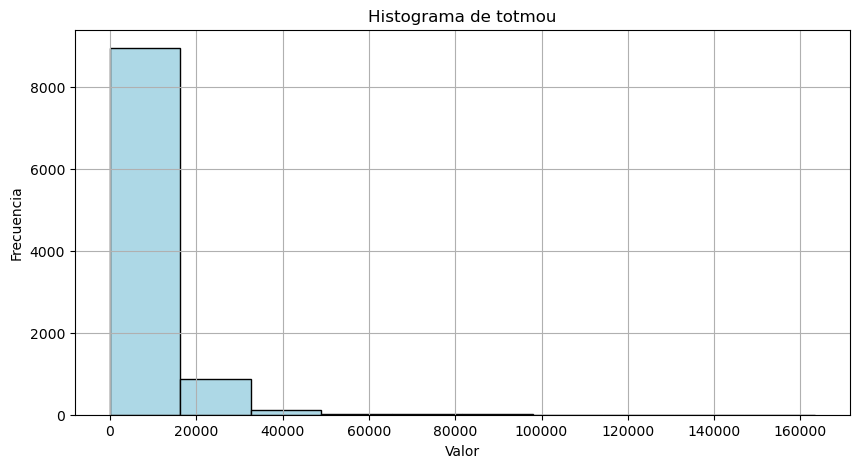

In [47]:
# Histograma para la variable 'toutmou'
plt.figure(figsize=(10, 5))
plt.hist(datos['totmou'], color='lightblue', edgecolor='black')
plt.title('Histograma de totmou')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

La mayoría de clientes dedican entre 0 y 20.000 minutos de interacción con la compañía, mientras que la minoría más de 140.000. Teniendo en cuenta los límites de cada una de las clases del histograma, esta gráfica se encuentra sesgada a la izquierda, lo cual coincide con que la media es mayor a la mediana.

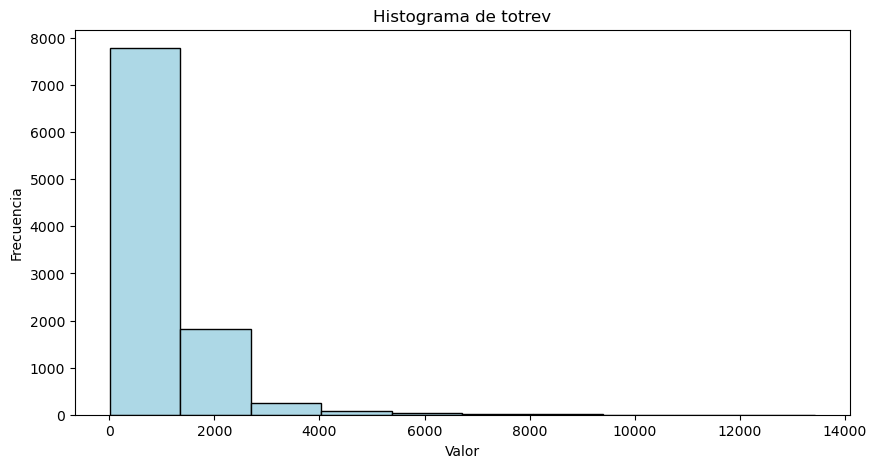

In [48]:
# Hstograma para la variable 'totrev'
plt.figure(figsize=(10, 5))
plt.hist(datos['totrev'], color='lightblue', edgecolor='black')
plt.title('Histograma de totrev')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
# plt.grid(True)
plt.show()

Para esta gráfica también tenemos un sesgo a la izquierda, ya que también se tiene que la media es mayor a la mediana. En particular, las mayores frecuencias se encuentran agrupadas en las primeras clases del histograma.

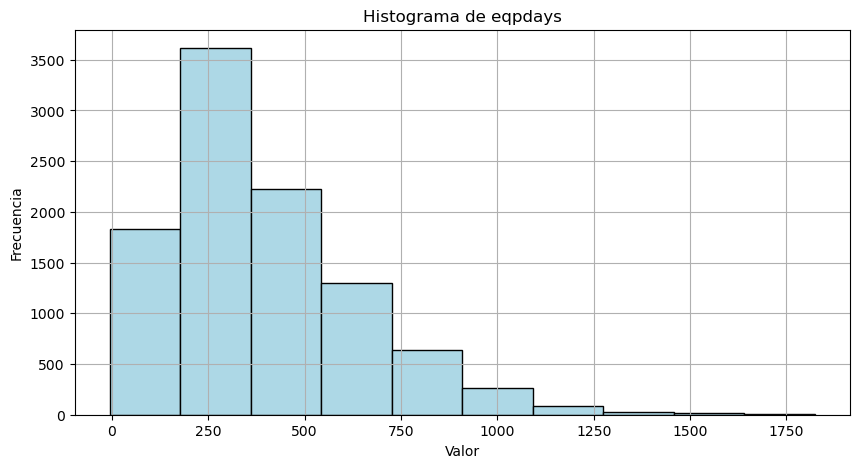

In [49]:
# Crear un histograma para la variable 'epqdays'
plt.figure(figsize=(10, 5))
plt.hist(datos['eqpdays'], color='lightblue', edgecolor='black')
plt.title('Histograma de eqpdays')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Esta distribución también se encuentra sesgada a la izquierda, sin embargo, las frecuencias parecen estar mejor distribuidas entre las diferentes clases. Tenemos que la moda se encuentra en la segunda clase (200 a 350 días de antigüedad)

### 3.4.2. Gráfico circular para variables categóricas

En este caso solo tenemos una variable categórica que es "creditcd". Podemos utilizar tanto un gráfico de barras, como un gráfico circular. Como solamente tenemos dos clases relativamente balanceadas (una de las clases representa al menos el 10% de las observaciones), procedemos a utilizar un gráfico circular.

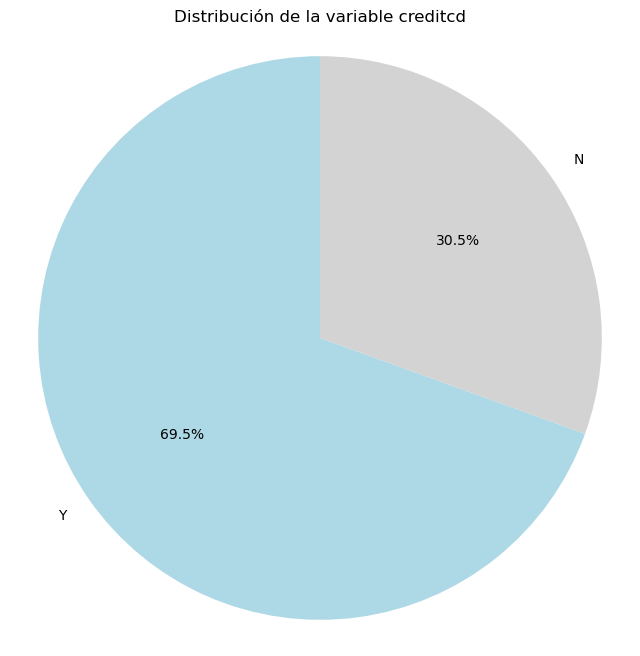

In [53]:
counts = datos['creditcd'].value_counts()

labels = counts.index
sizes = counts.values

colors = ['lightblue', 'lightgray']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de la variable creditcd')
plt.axis('equal')
plt.show()

Tal y como observamos, el 69% de los clientes tiene tarjeta de crédito, mientras que el 31% no tiene.

# 4. Relación entre 'totmou' y 'totrev'

Realizamos un gráfico de dispersión entre dos de las variables cuantitativas del problema: 'totmou' (minutos usados por el cliente) y 'totrev' (total de ingresos devengados por el cliente).

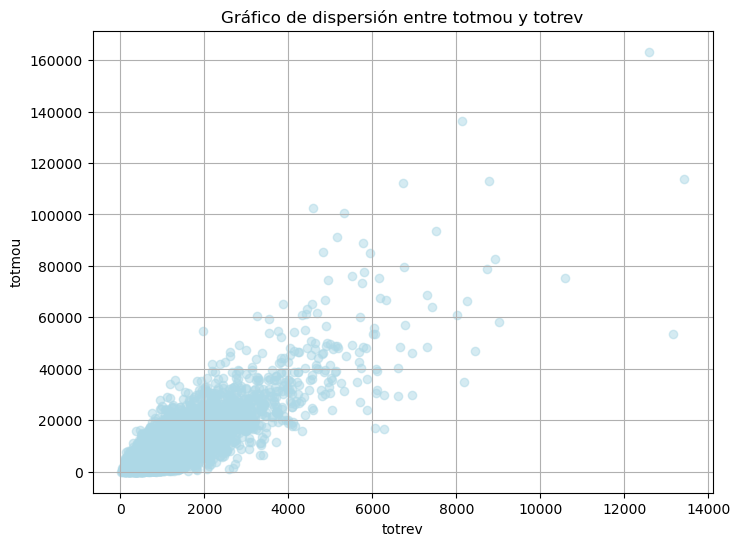

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(datos['totrev'], datos['totmou'], color='lightblue', alpha=0.5)
plt.title('Gráfico de dispersión entre totmou y totrev')
plt.xlabel('totrev')
plt.ylabel('totmou')
plt.grid(True)
plt.show()

Aparentemente tenemos una relación positiva, es decir, a mayor cantidad de ingresos, mayor es la utilización de minutos. Esto tiene mucho sentido, ya que a mayor volumen de ingresos, mayor es el poder adquisitivo del cliente y, por ende, mayor será la cantidad de minutos que dedicará a la empresa.

Esto también podemos determinarlo a través del coeficiente de correlación de Pearson entre ambas variables, como sigue:

In [60]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(datos['totmou'], datos['totrev'])

print("Coeficiente de correlación de Pearson:", correlation_coefficient)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: 0.8354845922593965
Valor p: 0.0


En este caso, tenemos un coeficiente de correlación de Pearson de 0.83, es decir, bastante cercano a 1. Esto indica una correlación positiva bastante fuerte entre ambas variables.

Además, si realizamos una prueba de hipótesis donde la hipótesis nula indica que no existe correlación entre ambas variables, obtenemos un p-value de casi 0, muy inferior a un nivel de significancia de 0.05. Esto indica que NO tenemos evidencia estadística suficiente para afirmar que ambas variables no están correlacionadas. Es decir, evidentemente tenemos una correlación (en este caso, positiva) entre ambas variables.

# 5. Relación entre 'totmou' y 'totrev' en función de 'creditcd'

Ahora nuevamente evaluamos la relación entre ambas variables, agregando la influencia de 'credictcd', que es la variable categórica que indica si el cliente tiene o no crédito.

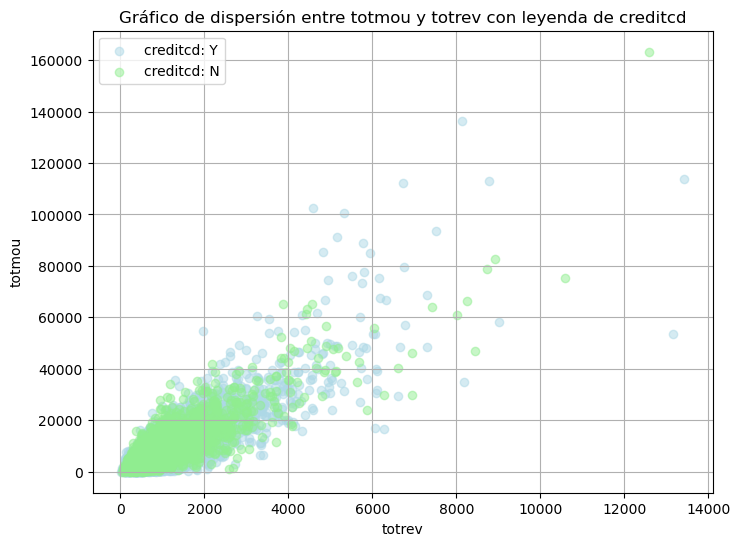

In [65]:
# Dividimps los datos en dos grupos según el valor de 'creditcd'
creditcd_Y = datos[datos['creditcd'] == 'Y']
creditcd_N = datos[datos['creditcd'] == 'N']

# Creamos el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(creditcd_Y['totrev'], creditcd_Y['totmou'], color='lightblue', alpha=0.5, label='creditcd: Y')
plt.scatter(creditcd_N['totrev'], creditcd_N['totmou'], color='lightgreen', alpha=0.5, label='creditcd: N')

plt.title('Gráfico de dispersión entre totmou y totrev con leyenda de creditcd')
plt.xlabel('totrev')
plt.ylabel('totmou')

# Agregamos la leyenda
plt.legend()

plt.grid(True)
plt.show()

Nuevamente observamos que esta relación se mantiene, independientemente de que el cliente tenga crédito (creditcd = Y) o no (credictcd = N). Validemos esto con el coeficiente de correlación de Pearson.

In [69]:
correlation_coefficient, p_value = pearsonr(creditcd_Y['totmou'], creditcd_Y['totrev'])

print("Coeficiente de correlación de Pearson:", correlation_coefficient)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: 0.8304280706358286
Valor p: 0.0


In [70]:
correlation_coefficient, p_value = pearsonr(creditcd_N['totmou'], creditcd_N['totrev'])

print("Coeficiente de correlación de Pearson:", correlation_coefficient)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: 0.8506198048016028
Valor p: 0.0


Vemos que en ambos casos el coeficiente de correlación de Pearson es mayor a 0.8, y la correlación entre ambas variables sigue siendo signifcativa. En conclusión, el hecho de tener crédito no afecta a ninguna de estas dos variables, ni su relación.